<a href="https://colab.research.google.com/github/vanshnawander/colab_notebooks_aiml/blob/main/Probability_and_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as pg
import plotly.express as px

In [2]:
def toss_coin(number_of_tosses=100):
    return pd.Series(np.random.choice(['Heads', 'Tails'], number_of_tosses))

def throw_dice(number_of_tosses=100):
    return pd.Series(np.random.randint(1, 6+1, number_of_tosses))

In [3]:
results = toss_coin(125)
print(results.value_counts())
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

Tails    63
Heads    62
dtype: int64


In [4]:
results = pd.Series([np.sum(toss_coin(20) == 'Heads') for _ in range(1000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [5]:
results = pd.Series([np.sum(toss_coin(500) == 'Heads') for _ in range(5000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [6]:
results = {shots: throw_dice(shots) for shots in [10, 100, 1000, 10000, 1000000]}
fig = pg.Figure([pg.Bar(x=result.value_counts().keys(),
                        y=result.value_counts().values / shots,)
                    for shots, result in results.items()])
fig.add_shape(type='line', x0=0.5, y0=1/6, x1=6.5, y1=1/6, line=dict(color='Blue',))
fig.show()

In [7]:
print(results)

{10: 0    3
1    5
2    2
3    3
4    4
5    6
6    2
7    4
8    4
9    3
dtype: int64, 100: 0     2
1     1
2     3
3     4
4     1
     ..
95    3
96    2
97    2
98    1
99    4
Length: 100, dtype: int64, 1000: 0      5
1      2
2      5
3      6
4      5
      ..
995    4
996    6
997    5
998    6
999    1
Length: 1000, dtype: int64, 10000: 0       1
1       6
2       3
3       6
4       2
       ..
9995    4
9996    3
9997    6
9998    5
9999    5
Length: 10000, dtype: int64, 1000000: 0         3
1         2
2         2
3         1
4         2
         ..
999995    3
999996    6
999997    1
999998    3
999999    4
Length: 1000000, dtype: int64}


In [8]:
def number_of_numbered_cards_drawn_before_ace(trials=100, show_trials=10):
    values = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    ranks = ['H', 'D', 'C', 'S']

    cards_thrown_counts = []
    for experiment in range(trials):
        deck_of_cards = [value + rank for value in values for rank in ranks]
        cards_thrown = 0
        cards_pile = []
        while len(deck_of_cards) > 0:
            picked_card = np.random.choice(deck_of_cards)
            cards_pile.append(picked_card)
            if picked_card[0] == 'A':
                break
            cards_thrown += 1
            deck_of_cards.remove(picked_card)
        if experiment < show_trials:
            print(cards_thrown, 'cards were thrown:', ' '.join(cards_pile))
        cards_thrown_counts.append(cards_thrown)

    return np.mean(cards_thrown_counts), cards_thrown_counts

expected_cards_thrown, cards_thrown_counts = number_of_numbered_cards_drawn_before_ace(10000)
print(f'\n{expected_cards_thrown} cards are tossed before we see the first ace!')

14 cards were thrown: JS 3H QH 8D 5D 2S 7D JD KH 6C 10H 8H JC 7S AS
3 cards were thrown: 7D 3D QC AS
33 cards were thrown: 4S 7C 6C 5D 2S 5S 6S KC JS 8D QS 6D KS 3H 6H JH 10H QC 4C 4H 9H 2D 8S 10D 8H 7D 3C 2C KD 5C KH 2H 9C AS
18 cards were thrown: JS QH 10H 9C 5H 7D 4D JC KD 3S QS 5C 7S 6S 3C KC 9D KH AH
1 cards were thrown: 8S AH
12 cards were thrown: JD 5D 10D KD 9S 6S JC 2S 9C 6C 9D 6D AD
5 cards were thrown: 6H JH KC 8H 9D AH
16 cards were thrown: KC 3H 6C 9C 7H 6H 7C 9D 10H 4D 3C 4S JC 6S KH 10C AS
0 cards were thrown: AS
0 cards were thrown: AH

9.5503 cards are tossed before we see the first ace!


In [9]:
results = pd.Series(cards_thrown_counts)
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

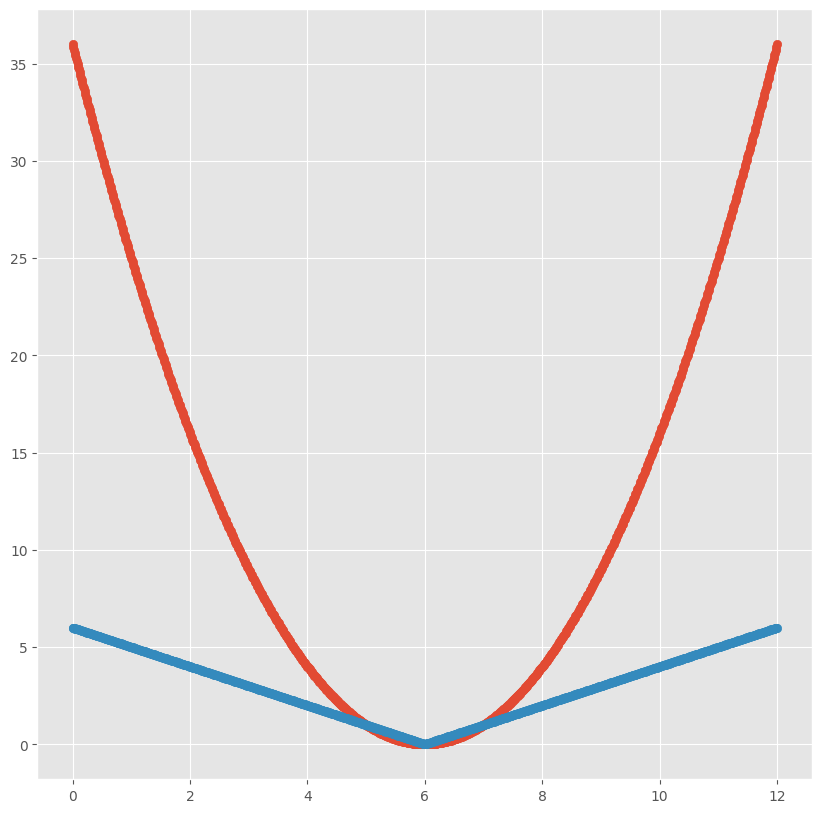

In [10]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))

measurements = np.linspace(0, 12, 1000)
plt.scatter(measurements, (measurements - 6) ** 2, label='Squared Error')
plt.scatter(measurements, abs(measurements - 6), label='Absolute Error')
plt.show()

In [11]:
grades = pd.read_csv("https://archive.org/download/ml-fundamentals-data/machine-learning-fundamentals-data/grades.csv")
print(grades.shape)
grades.agg(["mean", "var", "std"])

(26, 4)


<ipython-input-11-af8659b1f487>:3: FutureWarning:

['Name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



,Physics,Biology,Maths
mean,63.769231,67.038462,69.769231
var,517.224615,456.758462,300.664615
std,22.742573,21.371908,17.339683


In [12]:
print(grades)

         Name  Physics  Biology  Maths
0      Arnold       80       78     70
1         Bob       60       98     45
2   Cassandra       34       56     65
3     Donovan       56       65     32
4       Emily       98       23     55
5      Fabian       45       44     60
6        Grom       12       66     80
7      Hilary       60       88     78
8        Ivan       45       97     99
9        John       98       80     84
10      Kevin       78       78     65
11      Loius       56       66     66
12      Mandy       95       56     87
13    Natalie       75       78     60
14     Oliver       80       98     89
15    Patrick       69       56     85
16     Quiton       45       56     80
17     Robert       78       66     70
18      Sofia       88       98     50
19      Terry       77       77     60
20      Usman       40       64     88
21    Vanessa       50       48     98
22     Wilson       66       75     67
23     Xavier       89       75     40
24       Yuki       60   

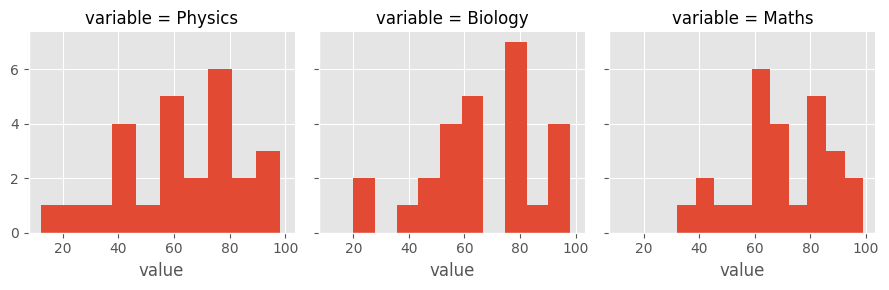

In [13]:
g = sns.FacetGrid(grades.melt("Name"), col="variable")
g.map(plt.hist, "value")

In [14]:
grades["Physics_std"] = (grades["Physics"] - grades["Physics"].mean()) / grades["Physics"].std()

In [15]:
grades

,Name,Physics,Biology,Maths,Physics_std
0,Arnold,80,78,70,0.713673
1,Bob,60,98,45,-0.165735
2,Cassandra,34,56,65,-1.308965
3,Donovan,56,65,32,-0.341616
4,Emily,98,23,55,1.505141
5,Fabian,45,44,60,-0.825291
6,Grom,12,66,80,-2.276314
7,Hilary,60,88,78,-0.165735
8,Ivan,45,97,99,-0.825291
9,John,98,80,84,1.505141


In [16]:
grades["Maths_std"] = (grades["Maths"] - grades["Maths"].mean()) / grades["Maths"].std()
grades.head()

,Name,Physics,Biology,Maths,Physics_std,Maths_std
0,Arnold,80,78,70,0.713673,0.013309
1,Bob,60,98,45,-0.165735,-1.428471
2,Cassandra,34,56,65,-1.308965,-0.275047
3,Donovan,56,65,32,-0.341616,-2.178196
4,Emily,98,23,55,1.505141,-0.851759


In [17]:
from scipy.stats import binom

In [18]:
binom.pmf(k=5, n=5, p=0.25)

0.0009765625

In [19]:
1 - binom.pmf(k=4, n=5, p=0.75) - binom.pmf(k=5, n=5, p=0.75)

0.3671875

In [20]:
binom.cdf(3, n=5, p=0.75)

0.3671875

In [21]:
from scipy.stats import norm

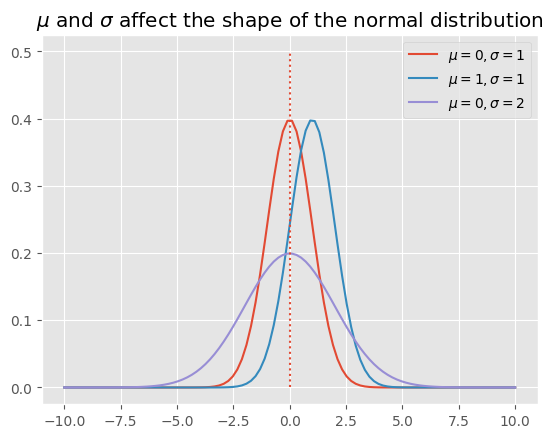

In [22]:
x = np.linspace(-10, 10, 100)
f1 = norm.pdf(x, loc=0, scale=1)
f2 = norm.pdf(x, loc=1, scale=1)
f3 = norm.pdf(x, loc=0, scale=2)

plt.plot(x, f1, label="$\mu=0, \sigma=1$")
plt.plot(x, f2, label="$\mu=1, \sigma=1$")
plt.plot(x, f3, label="$\mu=0, \sigma=2$")
plt.vlines(x=0, ymin=0, ymax=0.5, linestyles="dotted")

plt.legend()
plt.title("$\mu$ and $\sigma$ affect the shape of the normal distribution")
plt.show()

In [23]:
norm.cdf(0)

0.5

In [24]:
norm.ppf(0.5)

0.0

In [25]:
norm.ppf(0.84, loc=169.57, scale=7.57)

177.09804617589782

In [27]:
norm.ppf(0.975, loc=169.57, scale=7.57)

184.4069273629682

In [28]:
norm.ppf(0.0015, loc=169.57, scale=7.57)

147.10422390516268

In [29]:
from scipy.stats import poisson

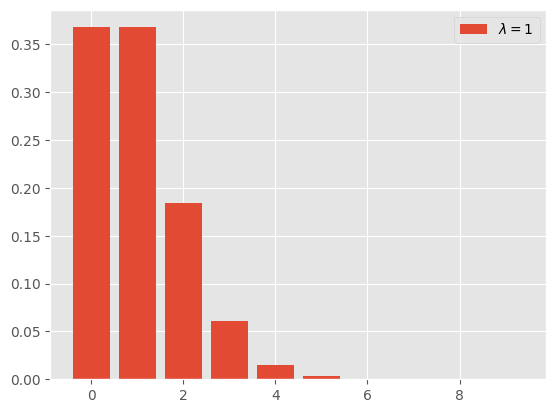

In [30]:
x = np.arange(10)
f1 = poisson.pmf(x, mu=1)
f2 = poisson.pmf(x, mu=2)
f3 = poisson.pmf(x, mu=3)

plt.bar(x, f1, label="$\lambda=1$")
plt.legend()

In [31]:
x @ f1

0.999998874797402

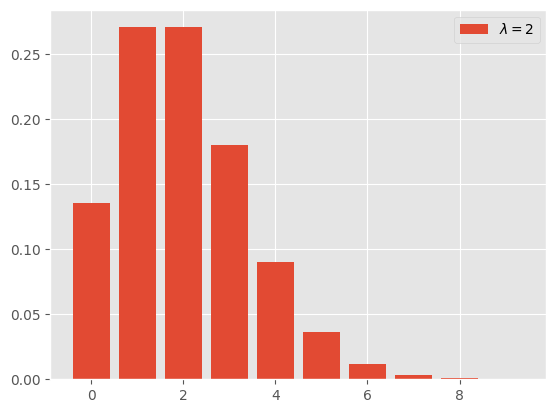

In [32]:
plt.bar(x, f2, label="$\lambda=2$")
plt.legend()

In [34]:
x @ f2

1.999525105343477

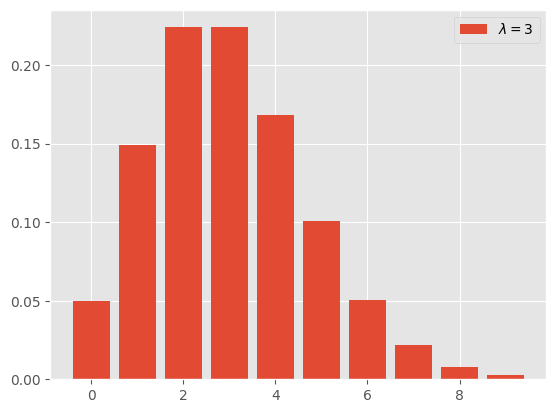

In [35]:
plt.bar(x, f3, label="$\lambda=3$")
plt.legend()

In [36]:
poisson.pmf(3, 5)

0.1403738958142805

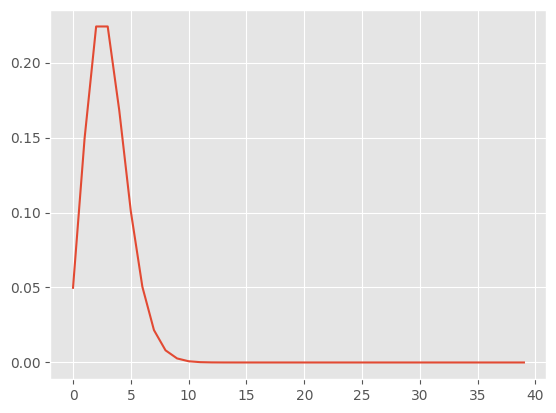

In [37]:
bins = np.arange(0, 40)
p_pois = poisson.pmf(bins, mu=3)
plt.plot(bins, p_pois)

(array([  6.,  21.,  50., 108.,  95.,  69.,  31.,  14.,   4.,   2.]),
 array([1.95, 2.2 , 2.45, 2.7 , 2.95, 3.2 , 3.45, 3.7 , 3.95, 4.2 , 4.45]),
 <BarContainer object of 10 artists>)

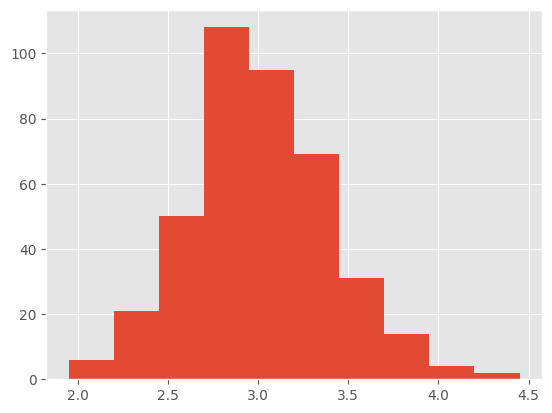

In [38]:
def sample_pois(_):
    samples = poisson.rvs(mu=3, size=20)
    return np.mean(samples)

means = list(map(sample_pois, np.arange(400)))
plt.hist(means)

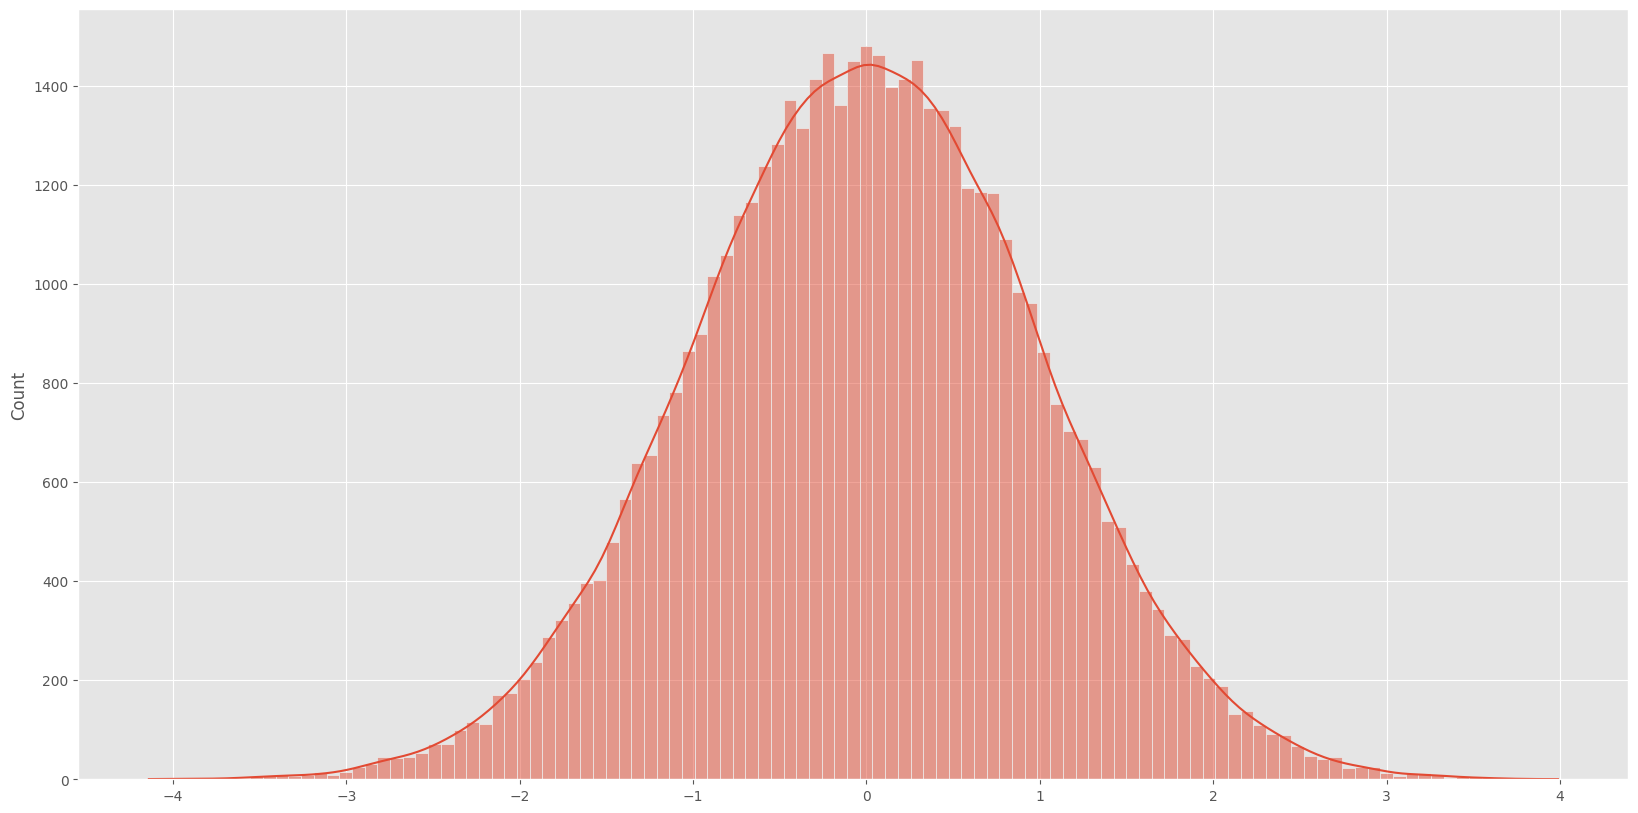

In [39]:
import seaborn as sns
plt.figure(figsize=(20, 10))
x = np.random.normal(size=(50000))
sns.histplot(x, kde=True)
plt.show()

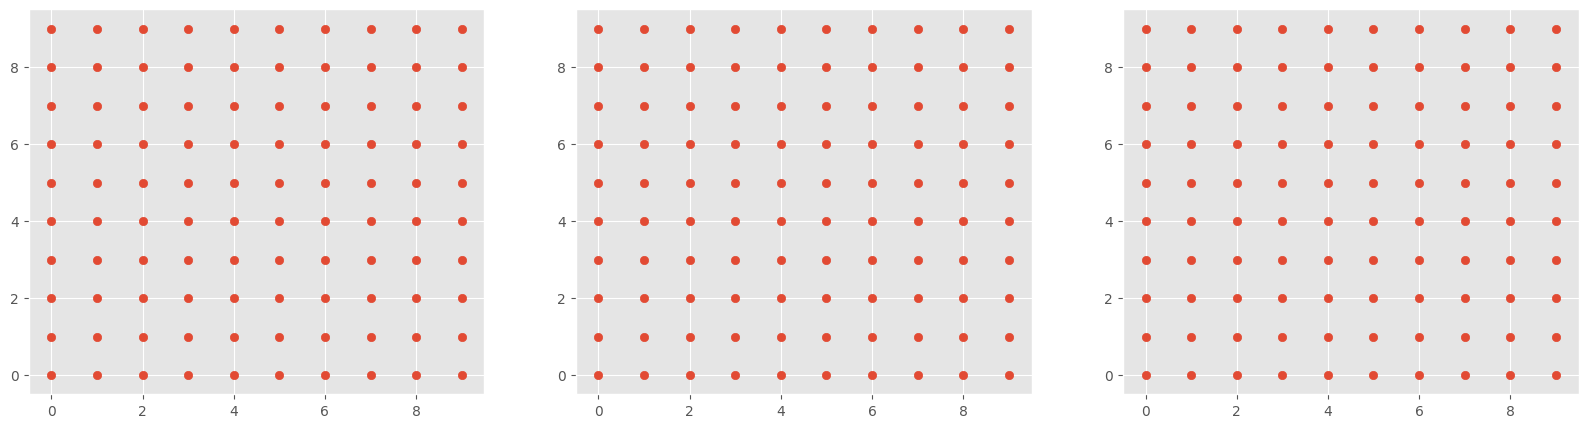

In [40]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.meshgrid(np.arange(10), np.arange(10))
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

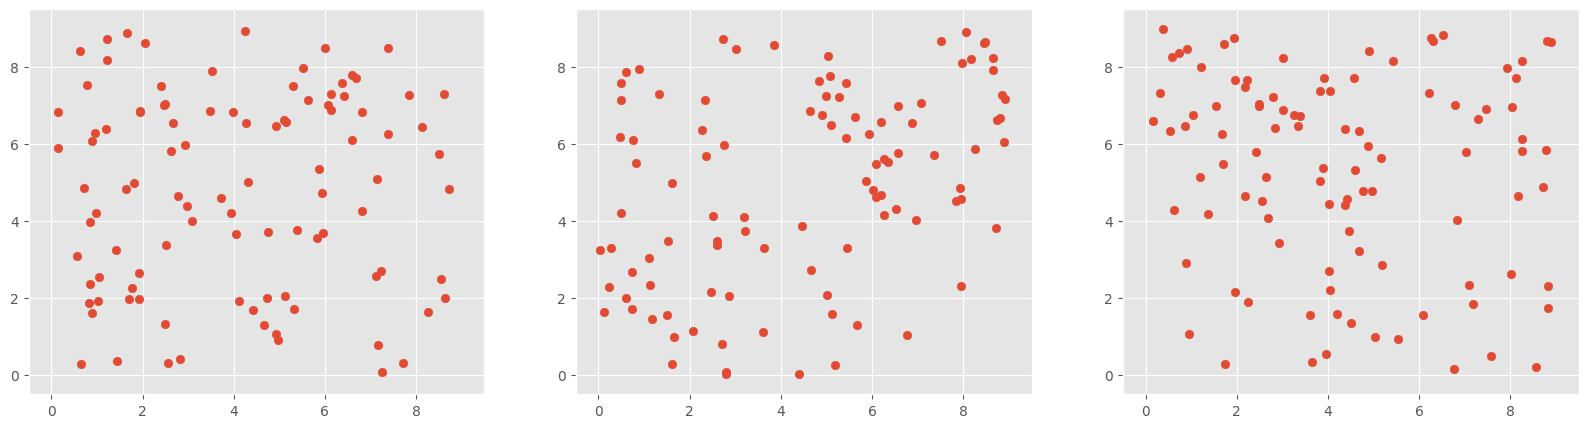

In [41]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.random.random(100) * 9, np.random.random(100) * 9
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

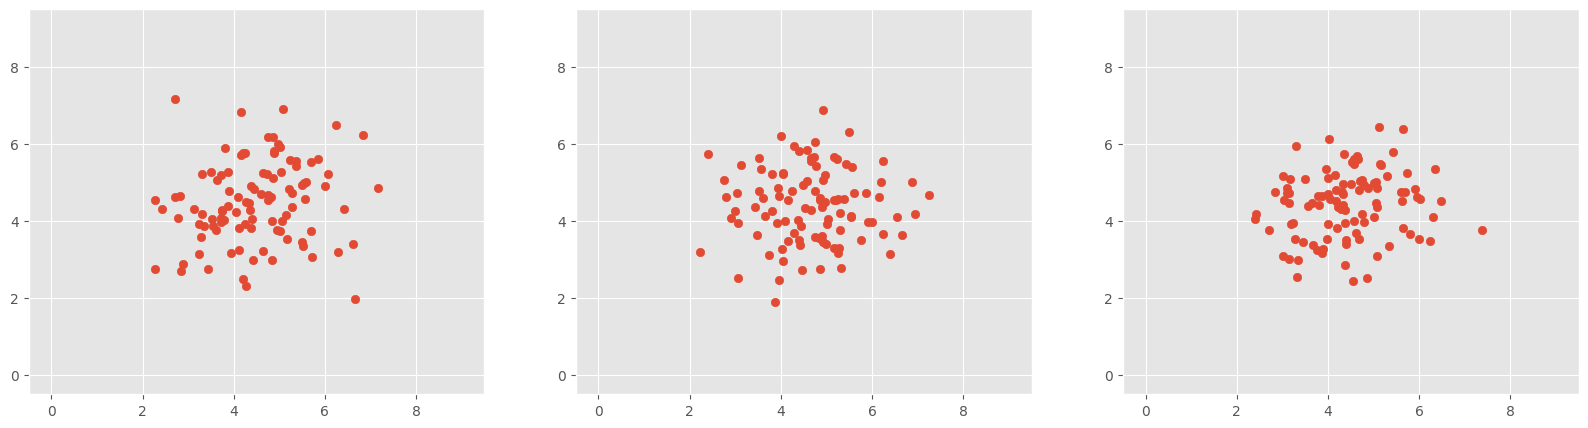

In [42]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.random.normal(loc=4.5, scale=1.0, size=100), np.random.normal(loc=4.5, scale=1.0, size=100)
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()